**Final Machine Learning project**

**The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions

### Install intial packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns

### Read data file

In [49]:
data = pd.read_csv("creditcard.csv")
data.dataframeName='creditcard.csv'

## Take a Quick Look at the Data Structure

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#There is no null values or missing values and all columns has float data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
# delete duplicate rows
data = data.drop_duplicates()

In [7]:
# understanding the values of columns (min-max-mean) to know if i need to scale data or not.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


## Take a Look at the Data Trend

Imbalanced Class


Text(0.5, 1.0, 'Class Distribution')

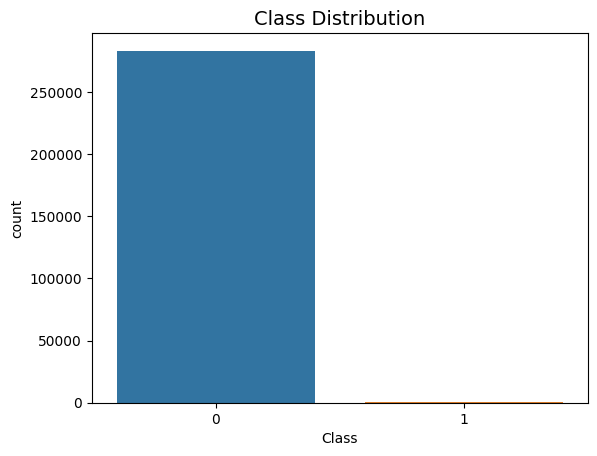

In [8]:
# Unique values which point to data is imbalanced that almost of transactions are non fraud . 
data.apply(lambda x: len(x.unique()))
data['Class'].value_counts()
sns.countplot(x ='Class',data=data)
print('Imbalanced Class')
plt.title('Class Distribution', fontsize=14) 

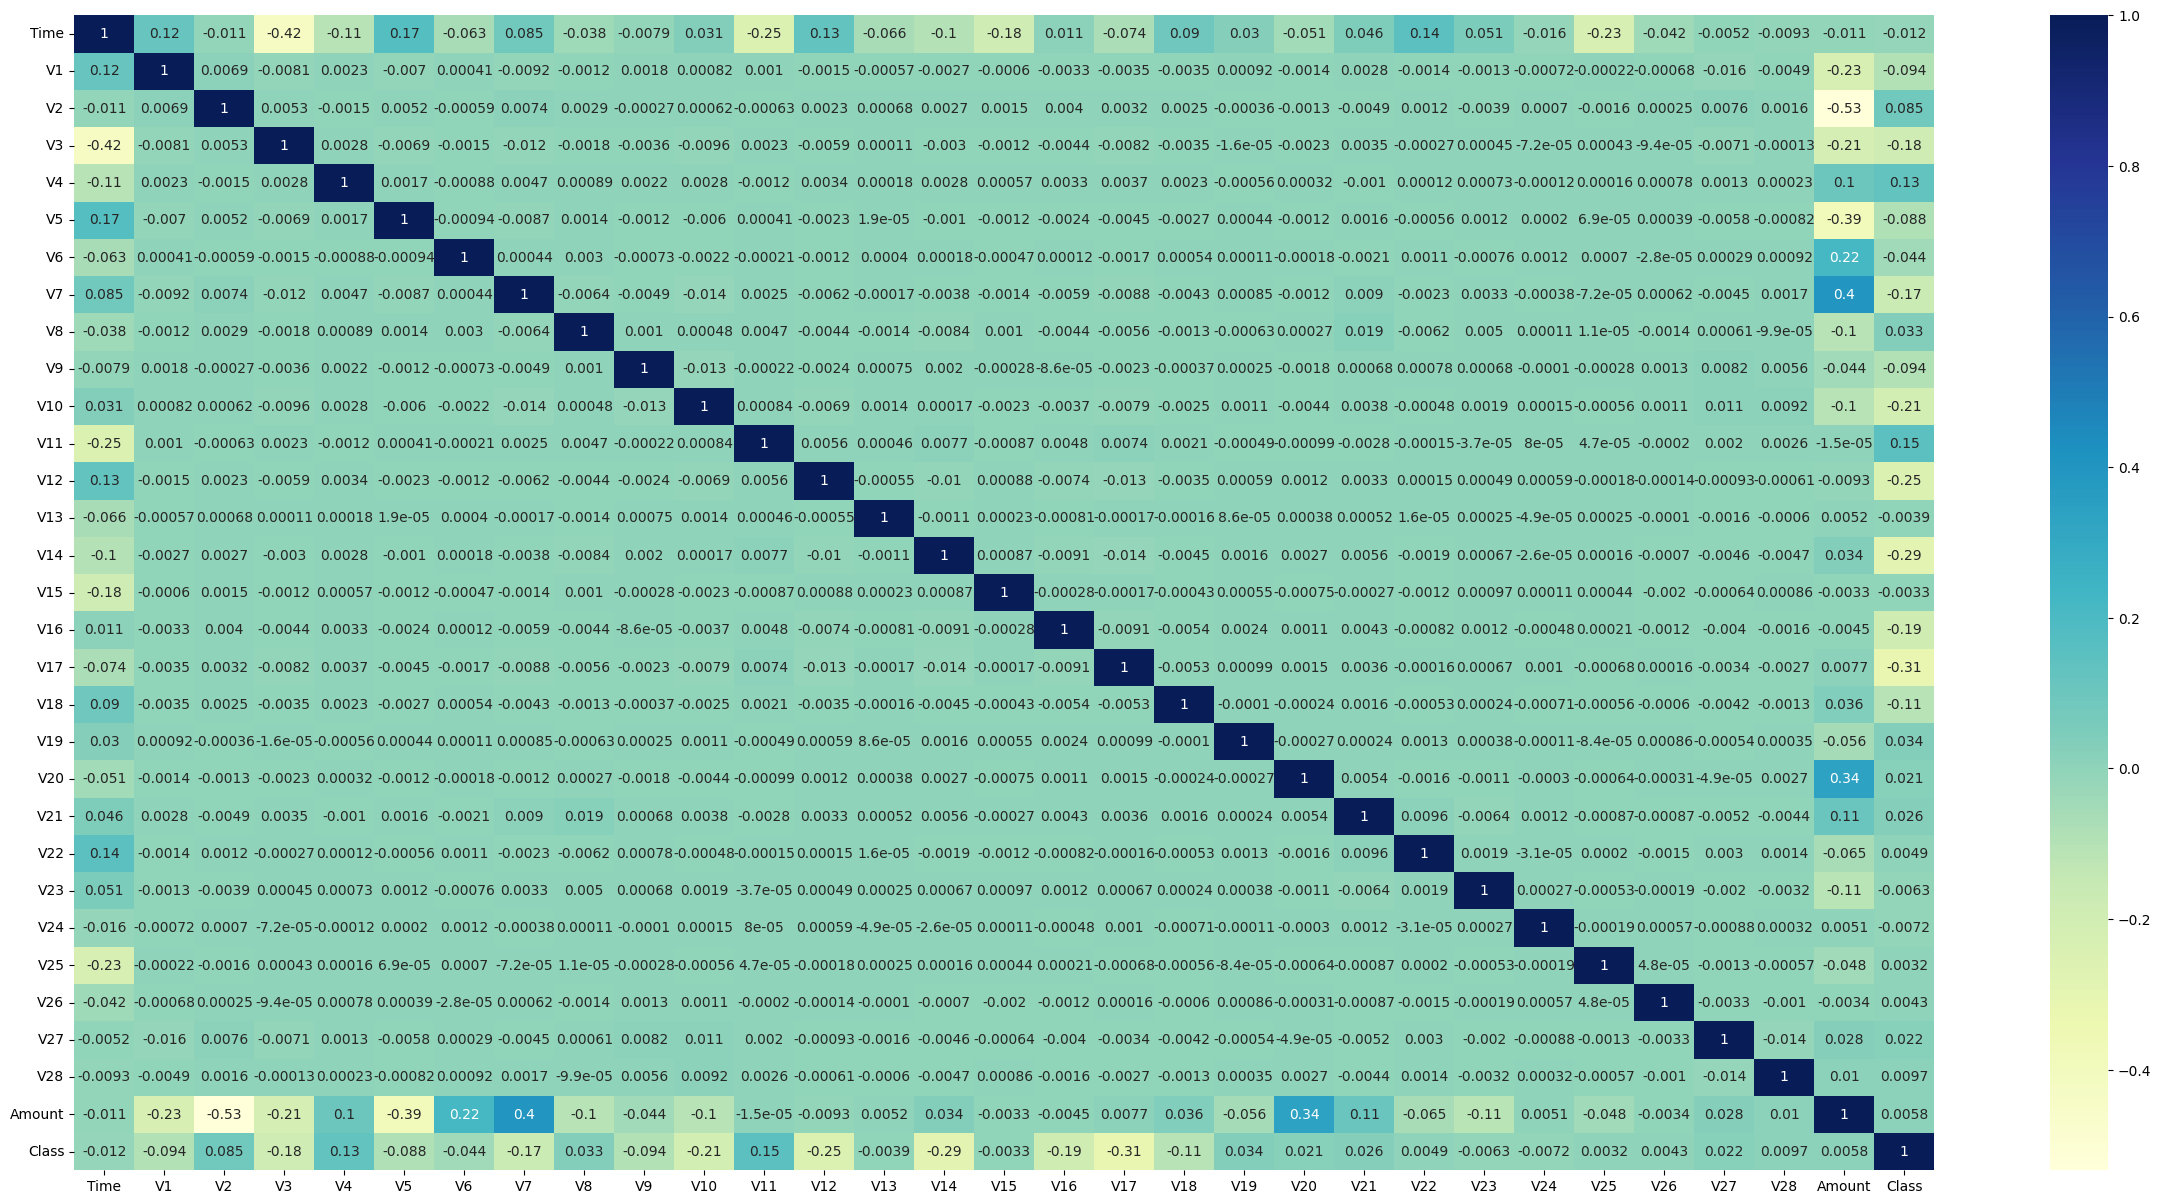

In [9]:
plt.figure(figsize=(30, 15))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [10]:
# to understand the effect of features according class column.
corr_matrix = data.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

array([[<AxesSubplot: xlabel='Class', ylabel='Class'>,
        <AxesSubplot: xlabel='V2', ylabel='Class'>,
        <AxesSubplot: xlabel='V4', ylabel='Class'>,
        <AxesSubplot: xlabel='V8', ylabel='Class'>,
        <AxesSubplot: xlabel='V11', ylabel='Class'>,
        <AxesSubplot: xlabel='V19', ylabel='Class'>,
        <AxesSubplot: xlabel='V20', ylabel='Class'>,
        <AxesSubplot: xlabel='V21', ylabel='Class'>,
        <AxesSubplot: xlabel='V27', ylabel='Class'>,
        <AxesSubplot: xlabel='V28', ylabel='Class'>,
        <AxesSubplot: xlabel='Amount', ylabel='Class'>],
       [<AxesSubplot: xlabel='Class', ylabel='V2'>,
        <AxesSubplot: xlabel='V2', ylabel='V2'>,
        <AxesSubplot: xlabel='V4', ylabel='V2'>,
        <AxesSubplot: xlabel='V8', ylabel='V2'>,
        <AxesSubplot: xlabel='V11', ylabel='V2'>,
        <AxesSubplot: xlabel='V19', ylabel='V2'>,
        <AxesSubplot: xlabel='V20', ylabel='V2'>,
        <AxesSubplot: xlabel='V21', ylabel='V2'>,
        <AxesSu

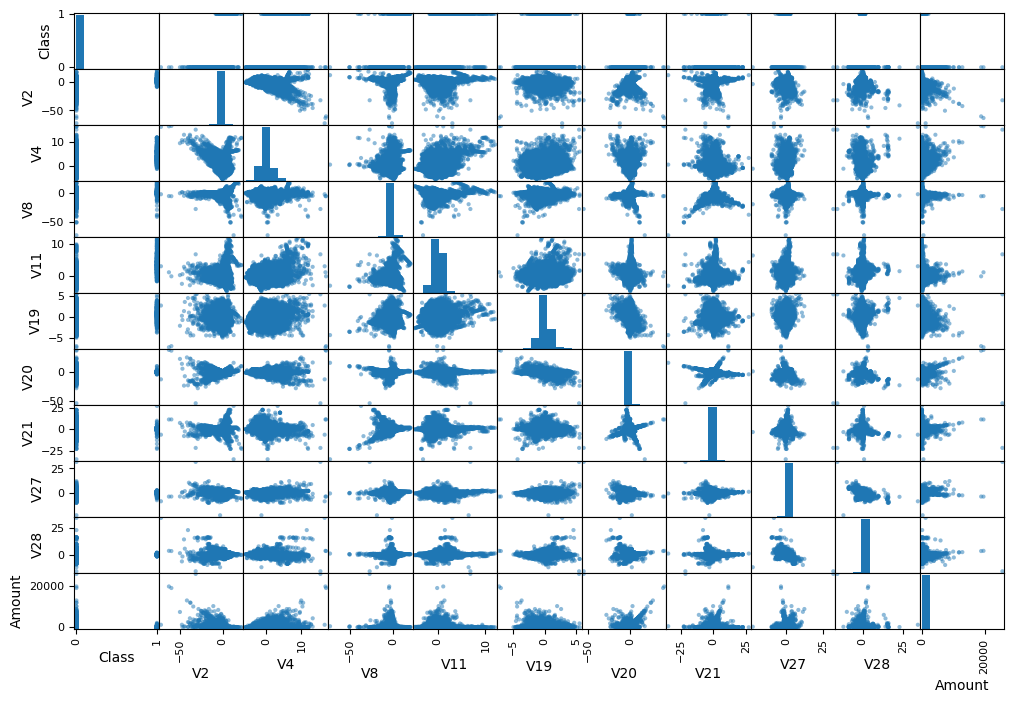

In [11]:
# to understand  trend of data between Features which has higher correlation
attributes = ['Class','V2','V4','V8','V11','V19','V20','V21','V27','V28','Amount']
scatter_matrix(data[attributes], figsize=(12, 8))

<function matplotlib.pyplot.show(close=None, block=None)>

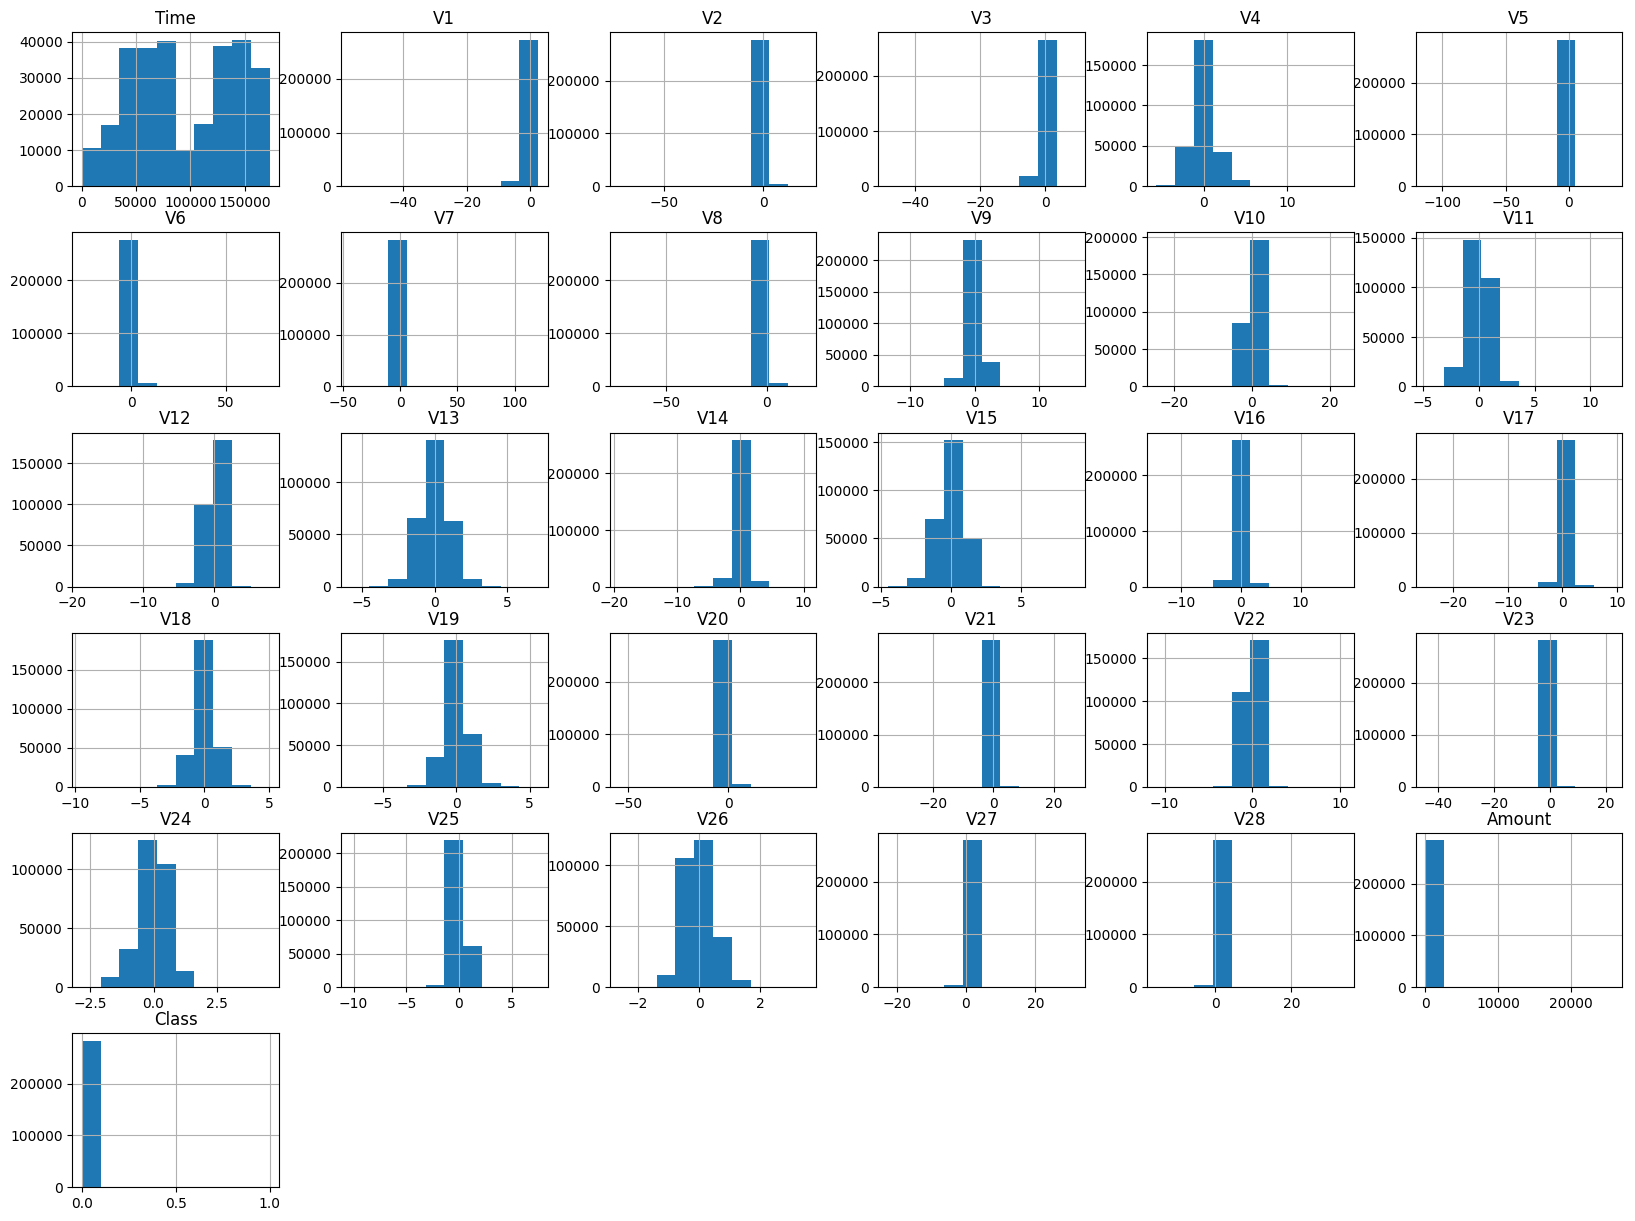

In [12]:
# to show data distribution of features for example there is right skew columns as V10, V22, V24 and left skew columns as v17, V15, V24.
data.hist(bins=10, figsize=(20,15))
plt.show

## preprocessing and sampling data

In [51]:
# scale Time and Amount to prone outliers
from sklearn.preprocessing import RobustScaler
robscl=RobustScaler()
data['scaled_amount']=robscl.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time']=robscl.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995
V10,283726.0,-0.001441,1.076407,-24.588262,-0.535578,-0.093237,0.453619,23.745136


## Modeling Data using logistic regression 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=data.drop('Class', axis=1)
y=data['Class']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)
log_model=LogisticRegression(max_iter=200)
log_model.fit(x_train, y_train)
y_pred=log_model.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.83      0.55      0.66        87

    accuracy                           1.00     56746
   macro avg       0.91      0.78      0.83     56746
weighted avg       1.00      1.00      1.00     56746



[[56649    10]
 [   39    48]]


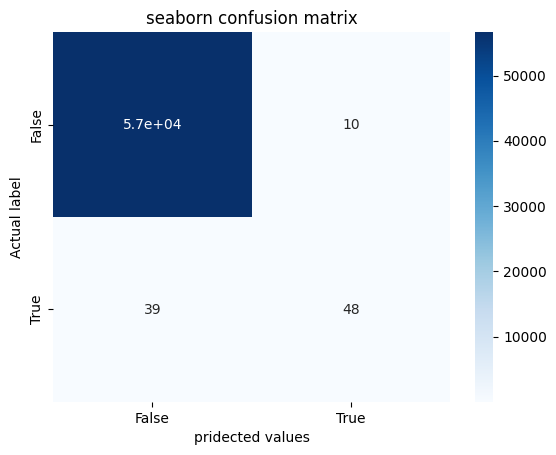

In [54]:
from sklearn.metrics import confusion_matrix
confmatrix=confusion_matrix(y_test, y_pred)
print(confmatrix)
ax=sns.heatmap(confmatrix, annot=True, cmap='Blues')
ax.set_title('seaborn confusion matrix') 
ax.set_xlabel('pridected values')
ax.set_ylabel('Actual label')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Due to the result of logistic regression modeling is not suitable for imbalanced class dataset that has accuracy shows the baise to class which has the highest distribution. so i need dealing with data by oversampling or undersampling before apply modeling techniques.

## OVERSAMPLING DATA

In [132]:
from imblearn.over_sampling import RandomOverSampler
x=data.drop('Class', axis=1)
y=data['Class']
ros = RandomOverSampler(random_state=42)
x_res, y_res= ros.fit_resample(x,y)

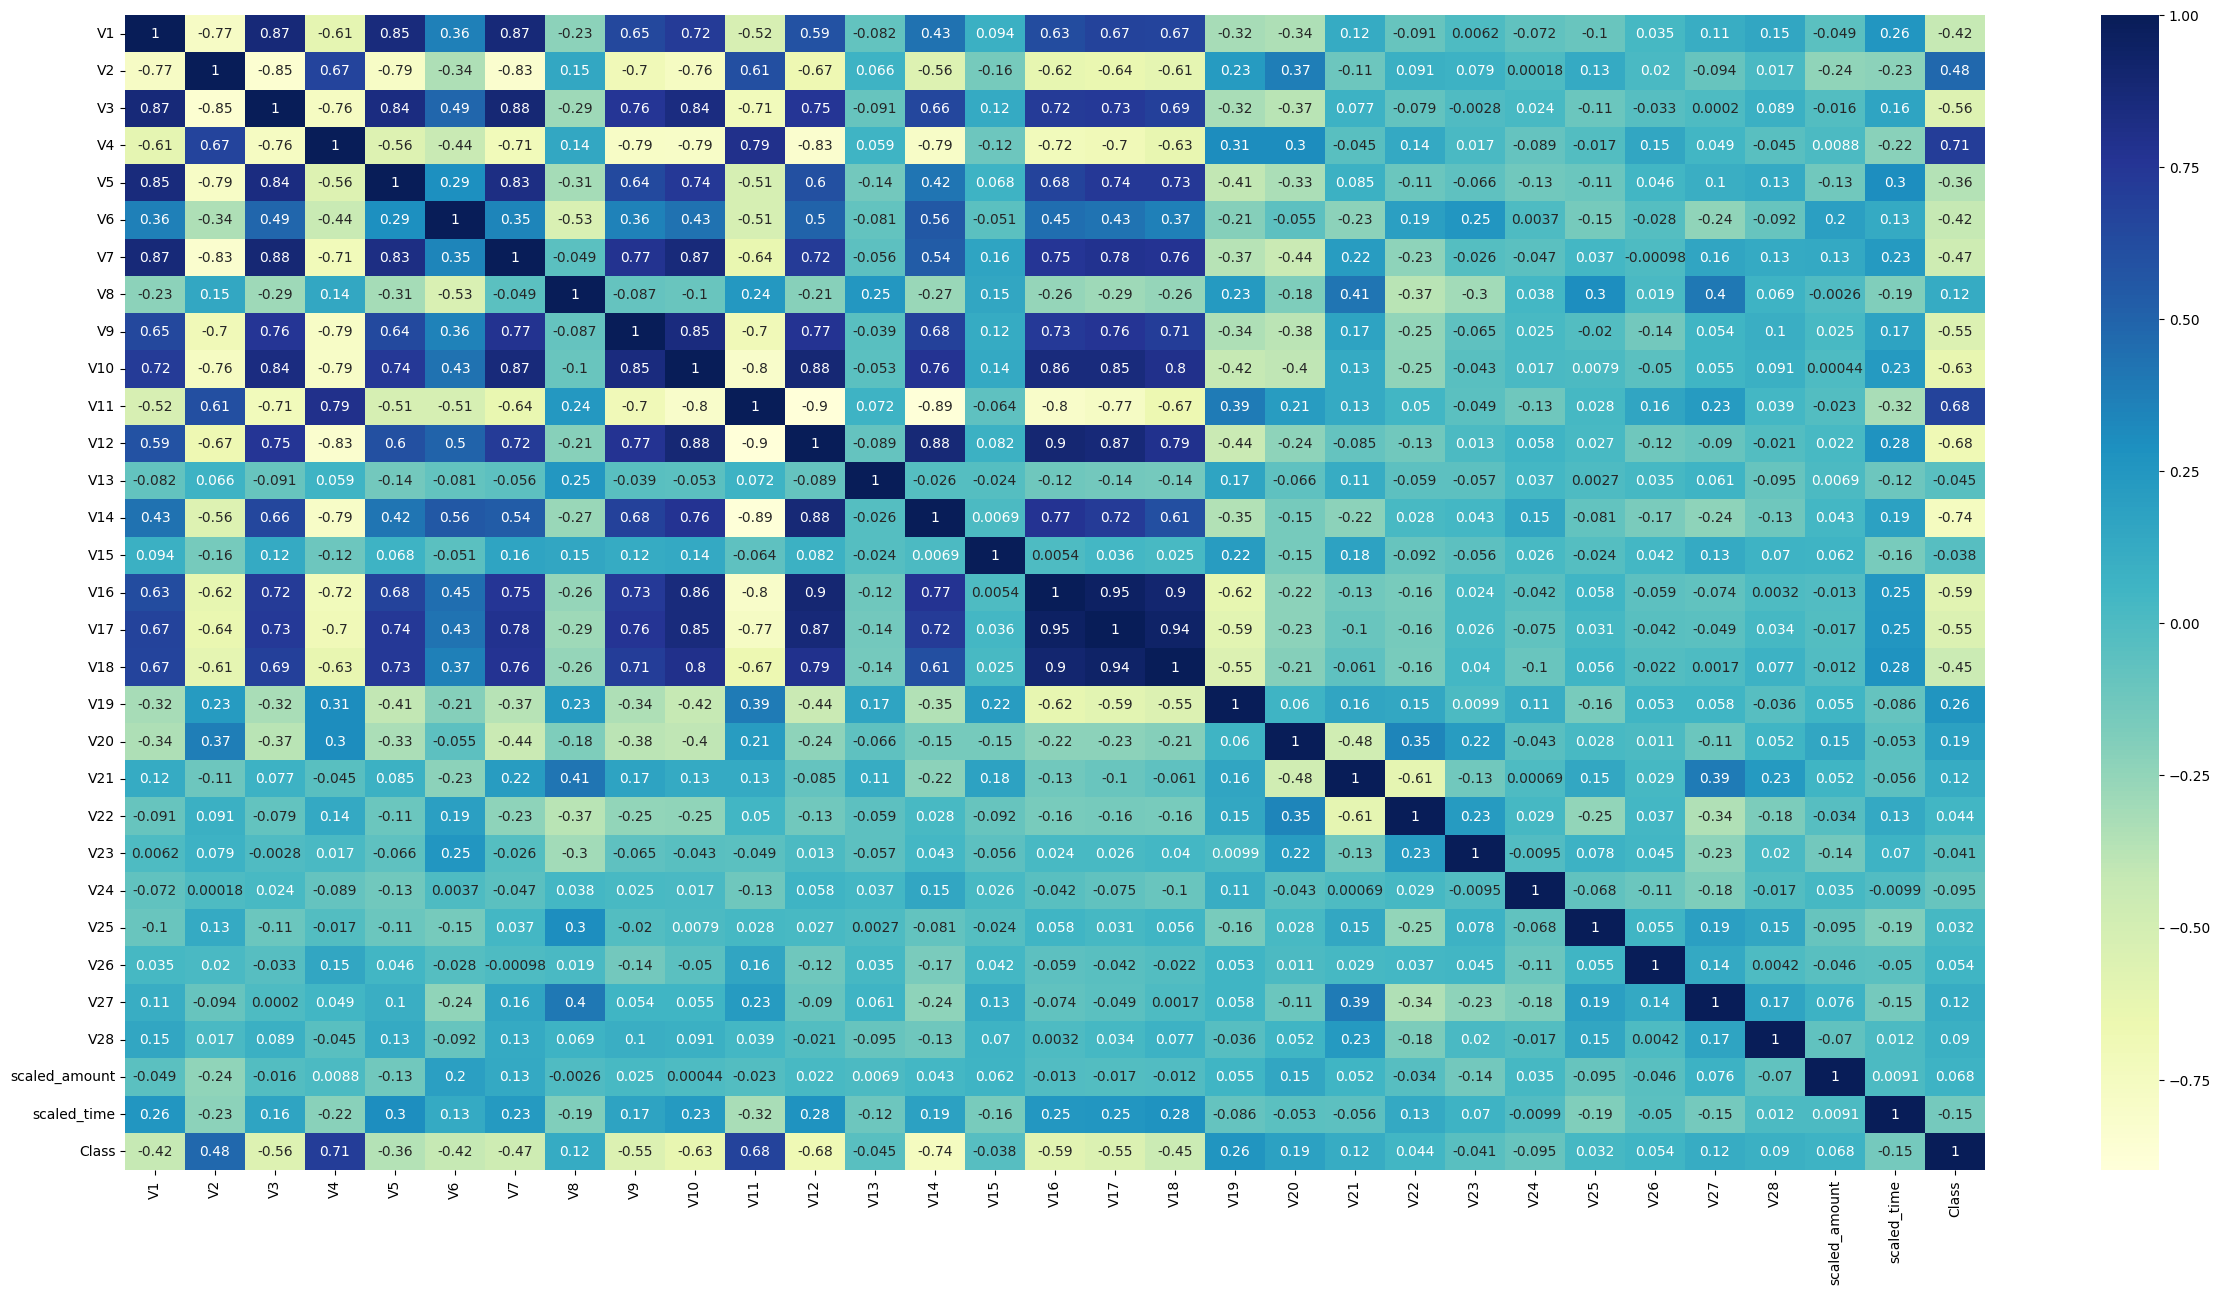

In [133]:
# correlation matrix after oversampling explain the relation between features better than original dataset
data_res=x_res
data_res['Class']=y_res
plt.figure(figsize=(30, 15))
dataplot = sns.heatmap(data_res.corr(), cmap="YlGnBu", annot=True)


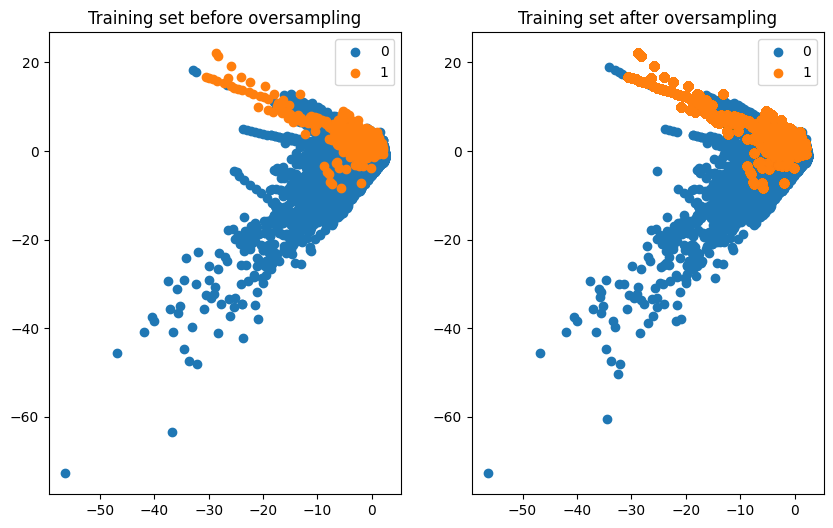

In [134]:
from collections import Counter
from matplotlib import figure
from numpy import where
from sklearn.model_selection import train_test_split
x_train_res, x_test_res, y_train_res, y_test_res= train_test_split(x_res, y_res, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
counter=Counter(y_train)
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
plt.title('Training set before oversampling')
plt.legend()
plt.subplot(1,2,2)
counter=Counter(y_train_res)
x_train_res1=x_train_res.to_numpy()
y_train_res1=y_train_res.to_numpy()
for label, _ in counter.items():
	row_ix = where(y_train_res1== label)[0]
	plt.scatter(x_train_res1[row_ix, 0], x_train_res1[row_ix, 1], label=str(label))
plt.title('Training set after oversampling')
plt.legend()
plt.show()

## Modeling Data using oversampling data and Logistic Regression 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56461
           1       1.00      1.00      1.00     56841

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

[[56461     0]
 [    0 56841]]


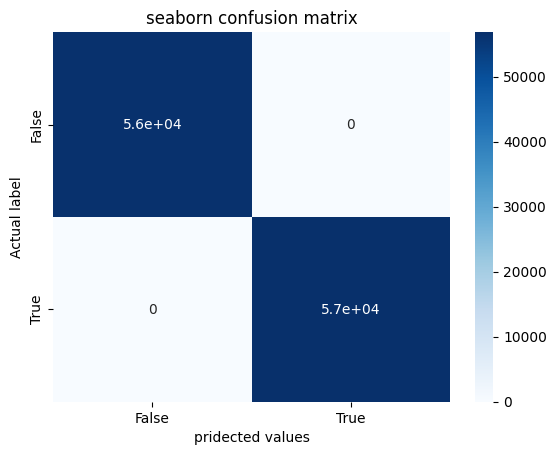

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data_res=x_res
data_res['Class']=y_res
x_train_res, x_test_res, y_train_res, y_test_res= train_test_split(x_res, y_res, test_size=0.2, random_state=0)
log_model=LogisticRegression(max_iter=200)
log_model.fit(x_train_res, y_train_res)
# to test logistic regression model
y_pred_resl=log_model.predict(x_test_res)
# to test logistic regression model
from sklearn.metrics import confusion_matrix, classification_report
class_report=classification_report(y_test_res, y_pred_resl)
print(class_report)
from sklearn.metrics import confusion_matrix
confmatrix=confusion_matrix(y_test_res, y_pred_resl)
print(confmatrix)
ax=sns.heatmap(confmatrix, annot=True, cmap='Blues')
ax.set_title('seaborn confusion matrix') 
ax.set_xlabel('pridected values')
ax.set_ylabel('Actual label')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [136]:
import sklearn.metrics as metrics
accuracy=metrics.accuracy_score(y_test_res, y_pred_resl)
f1_score=metrics.f1_score(y_test_res, y_pred_resl)
precision=metrics.precision_score(y_test_res, y_pred_resl)
recall=metrics.recall_score(y_test_res, y_pred_resl)
print(f'model accuracy ={100*accuracy} %')
print(f'model f1_score ={100*f1_score} %')
print(f'model precision ={100*precision} %')
print(f'model recall ={100*recall} %')

model accuracy =100.0 %
model f1_score =100.0 %
model precision =100.0 %
model recall =100.0 %


## Modeling Data using oversampling data and XGBoost

In [137]:
# using oversampling data
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
data_res=x_res
data_res['Class']=y_res
x_train_res, x_test_res, y_train_res, y_test_res= train_test_split(x_res, y_res, test_size=0.2, random_state=0)
XGB_model=XGBClassifier()
XGB_model.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [138]:
# to test xgb modeling
y_pred_resx=XGB_model.predict(x_test_res)
# to evaluate xgb modeling
from sklearn.metrics import confusion_matrix, classification_report
class_report=classification_report(y_test_res, y_pred_resx)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56461
           1       1.00      1.00      1.00     56841

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [139]:
import sklearn.metrics as metrics
accuracy=metrics.accuracy_score(y_test_res, y_pred_resx)
f1_score=metrics.f1_score(y_test_res, y_pred_resx)
precision=metrics.precision_score(y_test_res, y_pred_resx)
recall=metrics.recall_score(y_test_res, y_pred_resx)
print(f'model accuracy ={100*accuracy} %')
print(f'model f1_score ={100*f1_score} %')
print(f'model precision ={100*precision} %')
print(f'model recall ={100*recall} %')

model accuracy =100.0 %
model f1_score =100.0 %
model precision =100.0 %
model recall =100.0 %


[[56461     0]
 [    0 56841]]


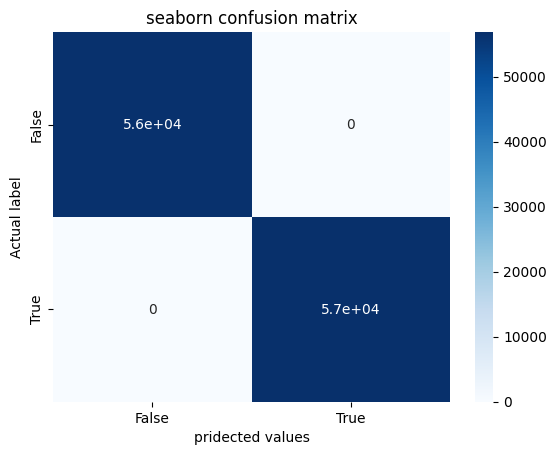

In [140]:
confmatrix=confusion_matrix(y_test_res, y_pred_resx)
print(confmatrix)
ax=sns.heatmap(confmatrix, annot=True, cmap='Blues')
ax.set_title('seaborn confusion matrix') 
ax.set_xlabel('pridected values')
ax.set_ylabel('Actual label')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Modling data using oversampling data using Ensemble 

In [111]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model1=DecisionTreeClassifier()
model2=LogisticRegression(max_iter=200)
model3=KNeighborsClassifier(n_neighbors=10)
final_model=VotingClassifier(estimators=[('DT',model1),('LR',model2),('KNN',model3)])
final_model.fit(x_train_res, y_train_res)
# to test ensemble model
y_pred_rese=final_model.predict(x_test_res)
# to evaluate  modeling
from sklearn.metrics import confusion_matrix, classification_report
class_report=classification_report(y_test_res, y_pred_rese)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56461
           1       1.00      1.00      1.00     56841

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



[[56461     0]
 [    0 56841]]


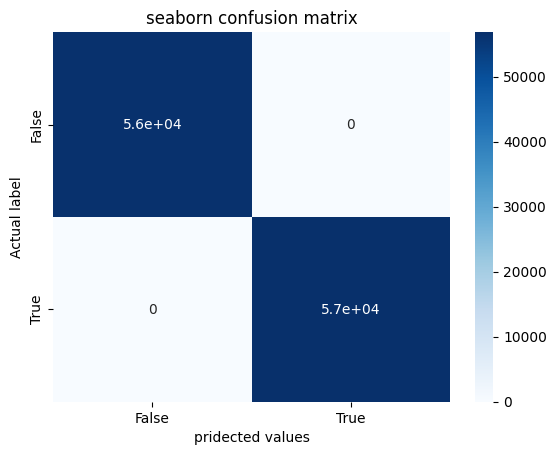

In [112]:
from sklearn.metrics import confusion_matrix
confmatrix=confusion_matrix(y_test_res, y_pred_rese)
print(confmatrix)
ax=sns.heatmap(confmatrix, annot=True, cmap='Blues')
ax.set_title('seaborn confusion matrix') 
ax.set_xlabel('pridected values')
ax.set_ylabel('Actual label')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [113]:
import sklearn.metrics as metrics
accuracy=metrics.accuracy_score(y_test_res, y_pred_rese)
f1_score=metrics.f1_score(y_test_res, y_pred_rese)
precision=metrics.precision_score(y_test_res, y_pred_rese)
recall=metrics.recall_score(y_test_res, y_pred_rese)
print(f'model accuracy ={100*accuracy} %')
print(f'model f1_score ={100*f1_score} %')
print(f'model precision ={100*precision} %')
print(f'model recall ={100*recall} %')

model accuracy =100.0 %
model f1_score =100.0 %
model precision =100.0 %
model recall =100.0 %


## Conclusion 

### oversampling is useful technique to improve over accuracy and recall and precision of all classes for imbalanced data classification.
### for this dataset Logistic regression modelling is sufficient to obtain the highest performance and techniques which depend on more than one techniques is not suitable or value. 